# P1bP1 Finite Elements for Stokes Equations

This example is to show the convergence of P1b-P1 finite elements for the Stokes equation on the unit square:

$$- \Delta u + {\rm grad}\, p  = f \quad {\rm div}\, u    = 0  \quad  \text{ in } \quad \Omega,$$

with the pure Dirichlet boundary condition. The solver is based on a DGS type smoother. 

**References**:
- [Finite Element Methods For Stokes Equations](http://www.math.uci.edu/~chenlong/226/FEMStokes.pdf)
- [Project: Finite Element Methods for Stokes Equations](../project/projectFEM.html)

**Subroutines**:

    - StokesP1bP1
    - squareStokes
    - femStokes
    - Stokesfemrate
    
The method is implemented in `StokesP1bP1` subroutine and can be tested in `squareStokes`. Together with other elements (CRP0, P2P0, P2P1, isoP2P0, isoP2P1, P1bP1), `femStokes` provides a concise interface to solve Stokes equation. The P1b-P1 element is tested in `Stokesfemrate`.

## P1b-P1 element

The velocity is P1 Lagrange element enriched by a cubic bubble function and the pressure is P1 Lagrange element. This pair is also known as MINI element. The bubble function is introduced to stabilize the non-stable P1-P1 pair. 

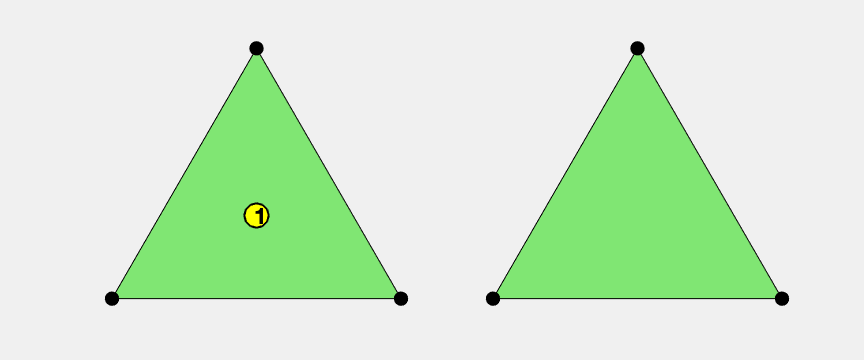

In [1]:
clear all;
imatlab_export_fig('print-png')  % Static png figures.
%% Local indexing of DOFs
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1 2 3];
% elem2dof = 1:6;
set(gcf,'Units','normal'); 
set(gcf,'Position',[0,0,0.3,0.2]);
subplot(1,2,1)
showmesh(node,elem); findnode(node,'all','noindex'); findelem(node,elem);
subplot(1,2,2)
showmesh(node,elem); findnode(node,'all','noindex');

## Dirichlet boundary condition

In [6]:
%% Setting
% mesh
[node,elem] = squaremesh([0,1,0,1],0.25);
[node,elem] = uniformrefine(node,elem);
bdFlag = setboundary(node,elem,'Dirichlet');
mesh = struct('node',node,'elem',elem,'bdFlag',bdFlag);
% pde
pde = Stokesdata1; 
% options
option.L0 = 0;
option.maxIt = 4;
option.printlevel = 1;
option.solver = 'asmg'; % use auxiliary space preconditioner

#dof:   1763,  #nnz:  12650, MG   ASMG iter:  8,  err = 9.1080e-09,  time = 0.22 s
#dof:   7107,  #nnz:  52906, MG   ASMG iter:  8,  err = 3.8331e-09,  time = 0.16 s
#dof:  28547,  #nnz: 216362, MG   ASMG iter:  8,  err = 3.8786e-09,  time = 0.77 s
#dof: 114435,  #nnz: 875050, MG   ASMG iter:  8,  err = 3.6838e-09,  time =  2.9 s
Table: Error
 #Dof        h      |u_I-u_h|_1    ||u-u_h||   ||u_I-u_h||_{max}

  1891   6.25e-02   1.80268e-01   2.14012e-02   3.65459e-02
  7363   3.12e-02   6.32875e-02   5.32944e-03   1.00022e-02
 29059   1.56e-02   2.21618e-02   1.32998e-03   2.61407e-03
115459   7.81e-03   7.77049e-03   3.32204e-04   6.68059e-04

 #Dof        h      ||p_I-p_h||    ||p-p_h||   

  1891   6.25e-02   1.01517e+00   7.11564e-01
  7363   3.12e-02   3.27813e-01   2.20345e-01
 29059   1.56e-02   1.08542e-01   7.02700e-02
115459   7.81e-03   3.68321e-02   2.31884e-02

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

  1891   1.00e-02   2.20e-01   3.00e-02   0.

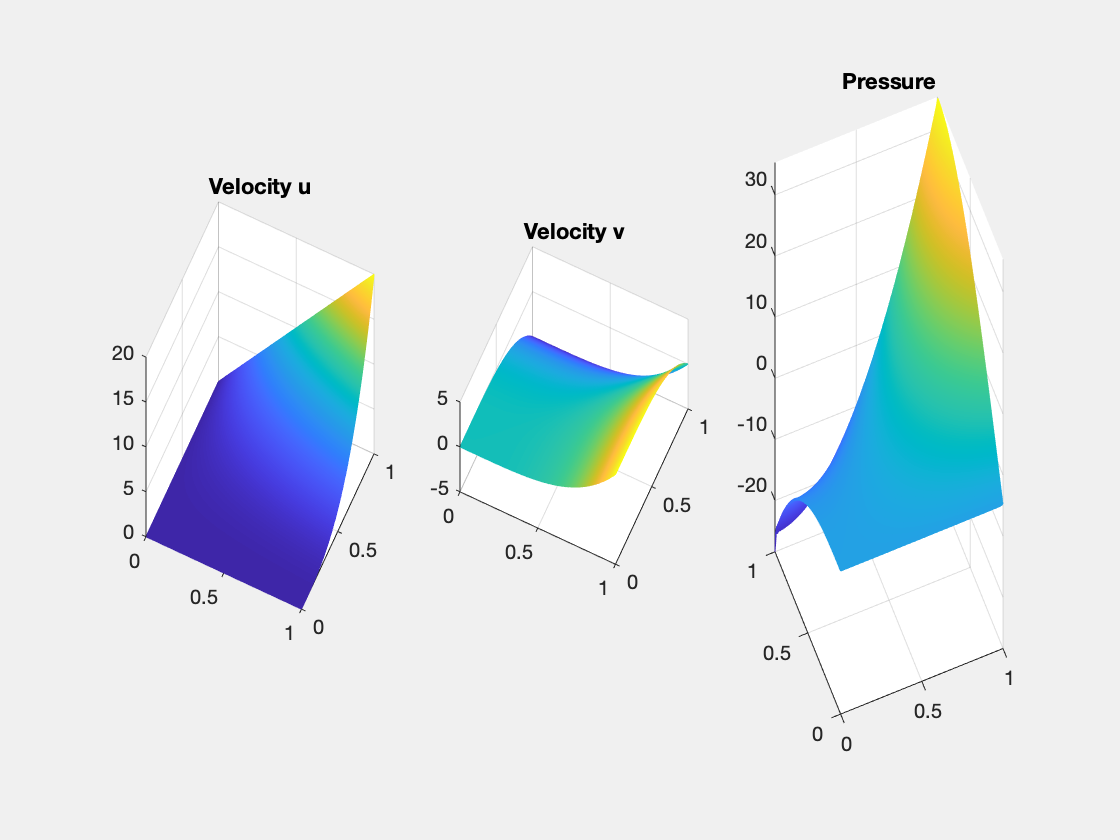

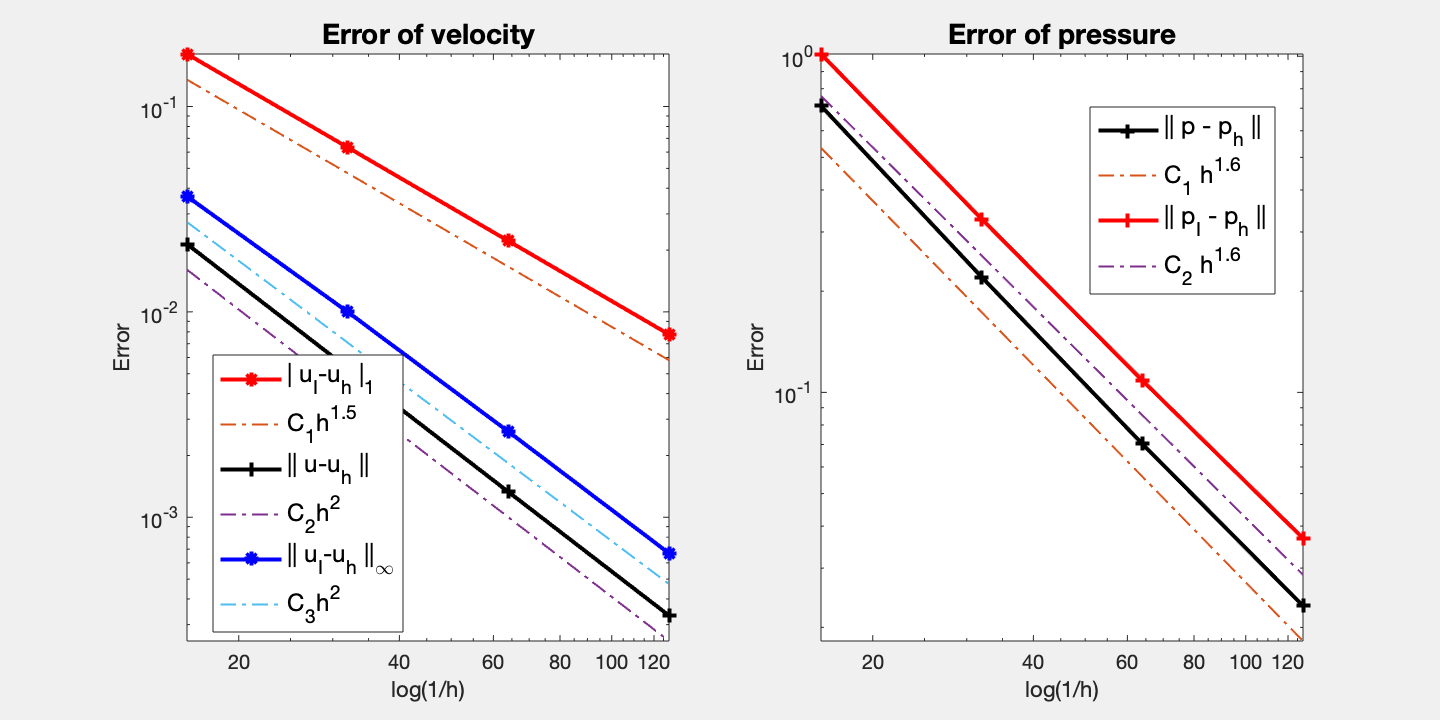

In [7]:
option.elemType = 'P1bP1';
femStokes(mesh,pde,option);

## Conclusion

Optimal second order convergence of velocity in L2 and maximum norm are observed and pressure is observed. For velocity, superconvergence (1.5 order) between nodal interpolate uI and uh is observed. For pressure, the order is also 1.5. 

Multigrid solver based on ASMG converges uniformly. Note that due to the bubble function, standard `mg` solver cannot be used.  

To-Do: test other boundary conditions.